# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

# Introduction/Business Problem

The problem is that sometimes we are making a trip and in the middle of the road there was a collision and you have to wait two hours until all the accident area had taken care. So is there a way to predict this accident?

The main idea is to predict an accident by some data that include weather, road condition, location, severity of the accident, type of coallision, etc.

# Data

### Data Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Import data set
df = pd.read_csv('Data-Collisions.csv')

/Users/leoin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Delete columns that will not be use
df.drop(['OBJECTID', 'INCKEY', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING','SDOTCOLNUM','ST_COLCODE','SDOT_COLCODE','COLDETKEY', 'REPORTNO', 'INTKEY', 'EXCEPTRSNCODE','SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYDESC','SEVERITYCODE.1','LOCATION', 'EXCEPTRSNDESC', 'STATUS', 'INCDATE' , 'ST_COLDESC', 'SDOT_COLDESC', 'INCDTTM'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


#### Nulls

In [3]:
# Identify and delete rows nulls in X, COLLISIONTYPE, JUNCTIONTYPE, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND
df = df.drop(df[df['X'].isna() == True].index)
df = df.drop(df[df['COLLISIONTYPE'].isna() == True].index)
df = df.drop(df[df['JUNCTIONTYPE'].isna() == True].index)
df = df.drop(df[df['UNDERINFL'].isna() == True].index)
df = df.drop(df[df['WEATHER'].isna() == True].index)
df = df.drop(df[df['ROADCOND'].isna() == True].index)
df = df.drop(df[df['LIGHTCOND'].isna() == True].index)

### Graph to understand data

In [4]:
df_graph = df[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT']]
df_graph.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,1.309935,2.479405,0.039413,0.030144,1.974498
std,0.462468,1.369008,0.204023,0.172311,0.560060
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000


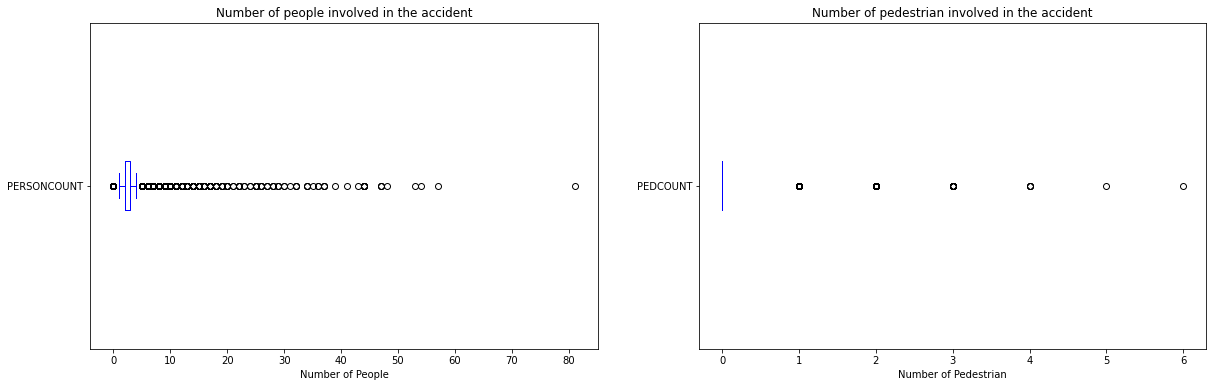

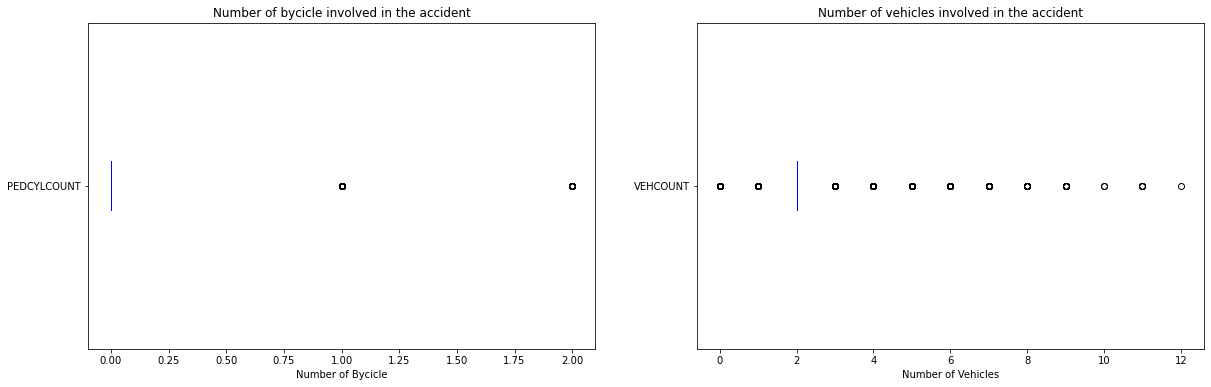

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).

# Subplot 1: Box plot
df[['PERSONCOUNT']].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Number of people involved in the accident')
ax1.set_xlabel('Number of People')

# Subplot 2: Box plot
df[['PEDCOUNT']].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax2) # add to subplot 1
ax2.set_title('Number of pedestrian involved in the accident')
ax2.set_xlabel('Number of Pedestrian')


fig2 = plt.figure() # create figure

ax3 = fig2.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, third plot)
ax4 = fig2.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, fourth plot).

# Subplot 3: Box plot
df[['PEDCYLCOUNT']].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax3) # add to subplot 1
ax3.set_title('Number of bycicle involved in the accident')
ax3.set_xlabel('Number of Bycicle')

# Subplot 4: Box plot
df[['VEHCOUNT']].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax4) # add to subplot 1
ax4.set_title('Number of vehicles involved in the accident')
ax4.set_xlabel('Number of Vehicles')

plt.show()

#### Strings to Categorical type

In [6]:
x = df.iloc[:, 1:16].values # Independientes Variables
y = df.iloc[:, 0].values # Variables Dependientes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder() # ADDRTYPE
x[:, 2] = labelencoder_X_1.fit_transform(x[:, 2])

labelencoder_X_1 = LabelEncoder() # COLLISIONTYPE
x[:, 3] = labelencoder_X_1.fit_transform(x[:, 3])

labelencoder_X_1 = LabelEncoder() # JUNCTIONTYPE
x[:, 8] = labelencoder_X_1.fit_transform(x[:, 8])

labelencoder_X_1 = LabelEncoder() # UNDERINFL
x[:, 9] = labelencoder_X_1.fit_transform(x[:, 9])

labelencoder_X_1 = LabelEncoder() # WEATHER
x[:, 10] = labelencoder_X_1.fit_transform(x[:, 10])

labelencoder_X_1 = LabelEncoder() # ROADCOND
x[:, 11] = labelencoder_X_1.fit_transform(x[:, 11])

labelencoder_X_1 = LabelEncoder() # LIGHTCOND
x[:, 12] = labelencoder_X_1.fit_transform(x[:, 12])

labelencoder_X_1 = LabelEncoder() # HITPARKEDCAR
x[:, 13] = labelencoder_X_1.fit_transform(x[:, 13])

  
#### Split data to Train a Test

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

 
#### Scale Data

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Modeling

## ANN

In [234]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout 


# Inicializar la RNA
classifier = Sequential()


# Añadir las capas de Entradas y primera capa Oculta
nodes = 46681
classifier.add(Dense(units = nodes,kernel_initializer="uniform",activation="relu", input_dim=x_train.shape[1])) 
classifier.add(Dropout(rate = 0.1))


# Añadir la capa de Salida
classifier.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid")) 



# Compilar la RNA
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


# Entrenamos la RNA
classifier.fit(x = x_train , y = y_train, batch_size = 5000, epochs = 20)


# Save Model
classifier.save("ann_model.h5")

Exception ignored in: <function TF_Output.<lambda> at 0x7fc637de09e0>
Traceback (most recent call last):
  File "/Users/leoin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 1057, in <lambda>
    __del__ = lambda self: None
KeyboardInterrupt


Epoch 1/20
  5000/144053 [>.............................] - ETA: 2:16 - loss: 0.7458 - accuracy: 0.3296

KeyboardInterrupt: 

### Results of Training
I have to train in Spyder of Anaconda because here the resaults were terrible, the folloring image are the results of the training of the ANN that are above:

![title](1.png)

### Evaluation

In [240]:
# Load Model
from keras.models import load_model
classifier = load_model("ann_model.h5")

# Predict with testing data
y_pred  = classifier.predict(x_test) 
y_pred_bool = (y_pred > 0.5) 

# elaborate confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_bool)
accurracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("\nAccuraccy:", accurracy)


Accuraccy: 0.04381629366357528


The confussion matrix and the accuracy in Spyder was the following:

![title](2.png)

## KNN


 [0.6780418726050981, 0.7164991392236353, 0.7030321541622703, 0.7267451546620759, 0.7157216637974121, 0.7306047648136835, 0.7229966124285, 0.7348253456988949, 0.7283278724940301, 0.736519131448881]


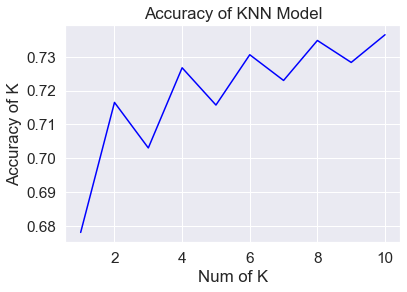

The k with the highest accuracy is: 10 value: 0.736519131448881


In [33]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Train model and search best k
k=10
l_knn_cm = []
for k in range(1, k+1):
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    yhat = knn_model.predict(x_test)
    l_knn_cm.append(confusion_matrix(y_test, yhat))

# Append accuracies
knn_acc = []
for cm in l_knn_cm:
    accurracy = (cm[0,0] + cm[1,1]) / cm.sum()
    knn_acc.append(accurracy)
print('\n',knn_acc)

# Plot accuraries
plt.plot(range(1, k+1), knn_acc, 'g', color='blue')
plt.title("Accuracy of KNN Model")
plt.xlabel("Num of K")
plt.ylabel("Accuracy of K")
plt.show()

# Print best k
c = 1
for i in knn_acc:
    if i == max(knn_acc):
        l_knn_cm = l_knn_cm[c-1]
        print("The k with the highest accuracy is:", c, "value:",i)
    c+=1


## Desicion Tree 


 [0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393, 0.7416004886988393]


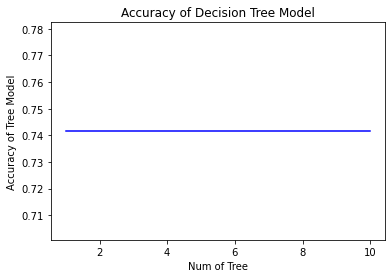

In [12]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Train model and search best number tree
n_tree=10
l_tree_cm = []
for k in range(1, n_tree+1):
    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3).fit(x_train, y_train)
    dtree_yhat = dtree.predict(x_test)
    l_tree_cm.append(confusion_matrix(y_test, dtree_yhat))

tree_acc = []
for cm in l_tree_cm:
    accurracy = (cm[0,0] + cm[1,1]) / cm.sum()
    tree_acc.append(accurracy)
print('\n',tree_acc)

plt.plot(range(1, k+1), tree_acc, 'g', color='blue')
plt.title("Accuracy of Decision Tree Model")
plt.xlabel("Num of Tree")
plt.ylabel("Accuracy of Tree Model")
plt.show()

# Print Confussion Matrix

To see better the results i made a plot of the confussion matrix:

In [10]:
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    #plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()

### Confussion Matrix ANN

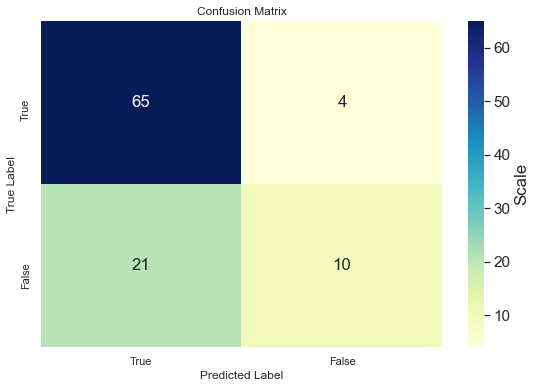

In [36]:
# define data
cm = np.array([[23265,1578],[7398,3773]])
data = (cm / cm.sum()) * 100
data[0][0] = round(data[0][0])
data[0][1] = round(data[0][1])
data[1][0] = round(data[1][0])
data[1][1] = round(data[1][1])
 
# define labels
labels = ["True", "False"]
 
# create confusion matrix
plot_confusion_matrix(data, labels)

### Confussion Matrix KNN

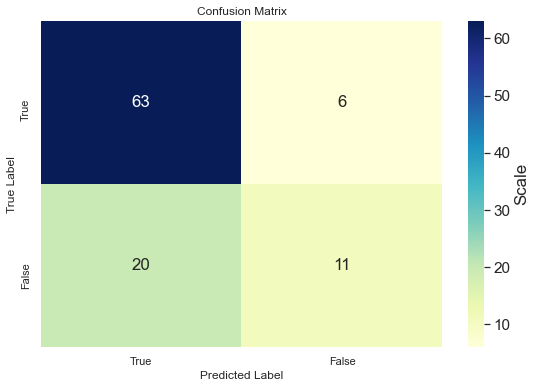

In [35]:
# define data
cm = l_knn_cm
data = (cm / cm.sum()) * 100
data[0][0] = round(data[0][0])
data[0][1] = round(data[0][1])
data[1][0] = round(data[1][0])
data[1][1] = round(data[1][1])
 
# define labels
labels = ["True", "False"]
 
# create confusion matrix
plot_confusion_matrix(data, labels)

### Confussion Matrix Desicion Tree

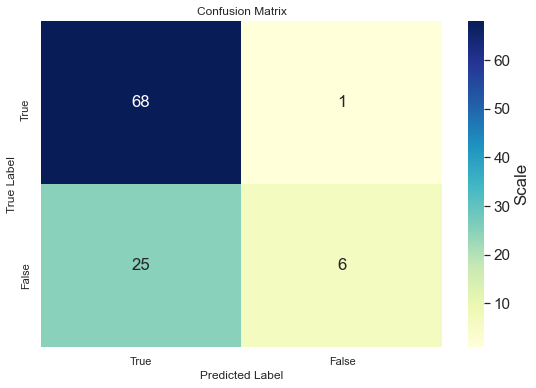

In [31]:
# define data
cm = l_tree_cm[0]
data = (cm / cm.sum()) * 100
data[0][0] = round(data[0][0])
data[0][1] = round(data[0][1])
data[1][0] = round(data[1][0])
data[1][1] = round(data[1][1])
 
# define labels
labels = ["True", "False"]
 
# create confusion matrix
plot_confusion_matrix(data, labels)

In the plot we can see the percentage of all posible options in the confussion matrix, if we sum 65% with 10% we get 75% that the model predict one value and the reality was correct, so we can say that our model have an accuracy of it, and if we sum 21% with 4% is 25% that the model predict one value and the reality was the other values.